# Questão 4

Dado 02 variáveis aleatórias independentes com distribuição Normal com médias zero e desvios padrões 1. Gere uma sequência com 5.000 amostras cada para uma delas. Então, obtenha a variável aleatória $Z = a.X + b.Y + C$. Calcule $Cov(X,Y), Cov(X,Z), E[Z]$ e $Var(Z)$ e compare com os valores teóricos. Plote os gráficos de dispersão de (X,Z) e analise o resultado. Utilize $a=1, b={-10, -1, -0.1, 0, +0.1, +1, +10}$. C é uma constante. Utilize $C={0, 5}$.

In [1]:
# Importação das bibliotecas
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parâmetros
num_samples = 5000
mean = 0
std = 1
a_values = [1]
b_values = [-10, -1, -0.1, 0, 0.1, 1, 10]
c_values = [0, 5]

# Variáveis aleatórias independentes X e Y com distribuição Normal
X = stats.norm.rvs(loc=mean, scale=std, size=num_samples)
Y = stats.norm.rvs(loc=mean, scale=std, size=num_samples)

# Inicialização de arrays para armazenar resultados
cov_XY_real = []
cov_XY_teorica = []
cov_XZ_real = []
cov_XZ_teorica = []
mean_Z_real = []
mean_Z_teorica = []
var_Z_real = []
var_Z_teorica = []

## Propriedades

1. $E[aX + B] = a \cdot E[X] + b$
2. $Var(X) = σ^2(X)$
3. $Var(aX) = a^2 \cdot Var(X)$
4. $Cov(X, Y) = E[(X - E[X])\cdot(Y - E[Y])] = \frac{\sum_{i=1}^{n} (x - m_x)\cdot(y-m_y)}{n}$

In [3]:
# Loop pelos valores de a, b e C
for a in a_values:
    for b in b_values:
        for c in c_values:

            print(f'------------- a = {a}, b = {b}, c = {c} ----------------')

            # Cálculo de Z
            Z = a * X + b * Y + c

            # Cálculo das estatísticas
            # Cov(X, Y)
            cov_XY_real.append(np.cov(X, Y)[0, 1]) # real
            # Pela ropriedade 4:
            cov_XY_teorica.append(np.sum((X-X.mean())*(Y-Y.mean()))/num_samples) # teórica

            # Cov(X, Z)
            cov_XZ_real.append(np.cov(X, Z)[0, 1])  # real
            # Pela propriedade 4
            cov_XZ_teorica.append(np.sum((X-X.mean())*(Z-Z.mean()))/num_samples) # teórica

            # E(Z)
            mean_Z_real.append(np.mean(Z))  # real
            # Pela propriedade 1
            mean_Z_teorica.append(a*mean + b*mean + c)

            # Var(Z)
            var_Z_real.append(np.var(Z)) # real
            # Pela propriedade 3
            var_Z_teorica.append(a**2 * std**2 + b**2 * std**2) # teórica

            # Print dos resultados
            print(f"Cov(X,Y) real = {cov_XY_real[-1]:.6f}")
            print(f"Cov(X,Y) teórica = {cov_XY_teorica[-1]:.6f}")
            print(f"Cov(X,Z) real = {cov_XZ_real[-1]:.6f}")
            print(f"Cov(X,Z) teórica = {cov_XZ_teorica[-1]:.6f}")
            print(f"E[Z] real = {mean_Z_real[-1]:.6f}")
            print(f"E[Z] teórico = {mean_Z_teorica[-1]:.6f}")
            print(f"Var(Z) real = {var_Z_real[-1]:.6f}")
            print(f"Var(z) teórico = {var_Z_teorica[-1]:.6f}\n")


------------- a = 1, b = -10, c = 0 ----------------
Cov(X,Y) real = 0.011214
Cov(X,Y) teórica = 0.011212
Cov(X,Z) real = 0.870044
Cov(X,Z) teórica = 0.869870
E[Z] real = 0.149975
E[Z] teórico = 0.000000
Var(Z) real = 100.401595
Var(z) teórico = 101.000000

------------- a = 1, b = -10, c = 5 ----------------
Cov(X,Y) real = 0.011214
Cov(X,Y) teórica = 0.011212
Cov(X,Z) real = 0.870044
Cov(X,Z) teórica = 0.869870
E[Z] real = 5.149975
E[Z] teórico = 5.000000
Var(Z) real = 100.401595
Var(z) teórico = 101.000000

------------- a = 1, b = -1, c = 0 ----------------
Cov(X,Y) real = 0.011214
Cov(X,Y) teórica = 0.011212
Cov(X,Z) real = 0.970968
Cov(X,Z) teórica = 0.970774
E[Z] real = 0.021872
E[Z] teórico = 0.000000
Var(Z) real = 1.956000
Var(z) teórico = 2.000000

------------- a = 1, b = -1, c = 5 ----------------
Cov(X,Y) real = 0.011214
Cov(X,Y) teórica = 0.011212
Cov(X,Z) real = 0.970968
Cov(X,Z) teórica = 0.970774
E[Z] real = 5.021872
E[Z] teórico = 5.000000
Var(Z) real = 1.956000
Var(z

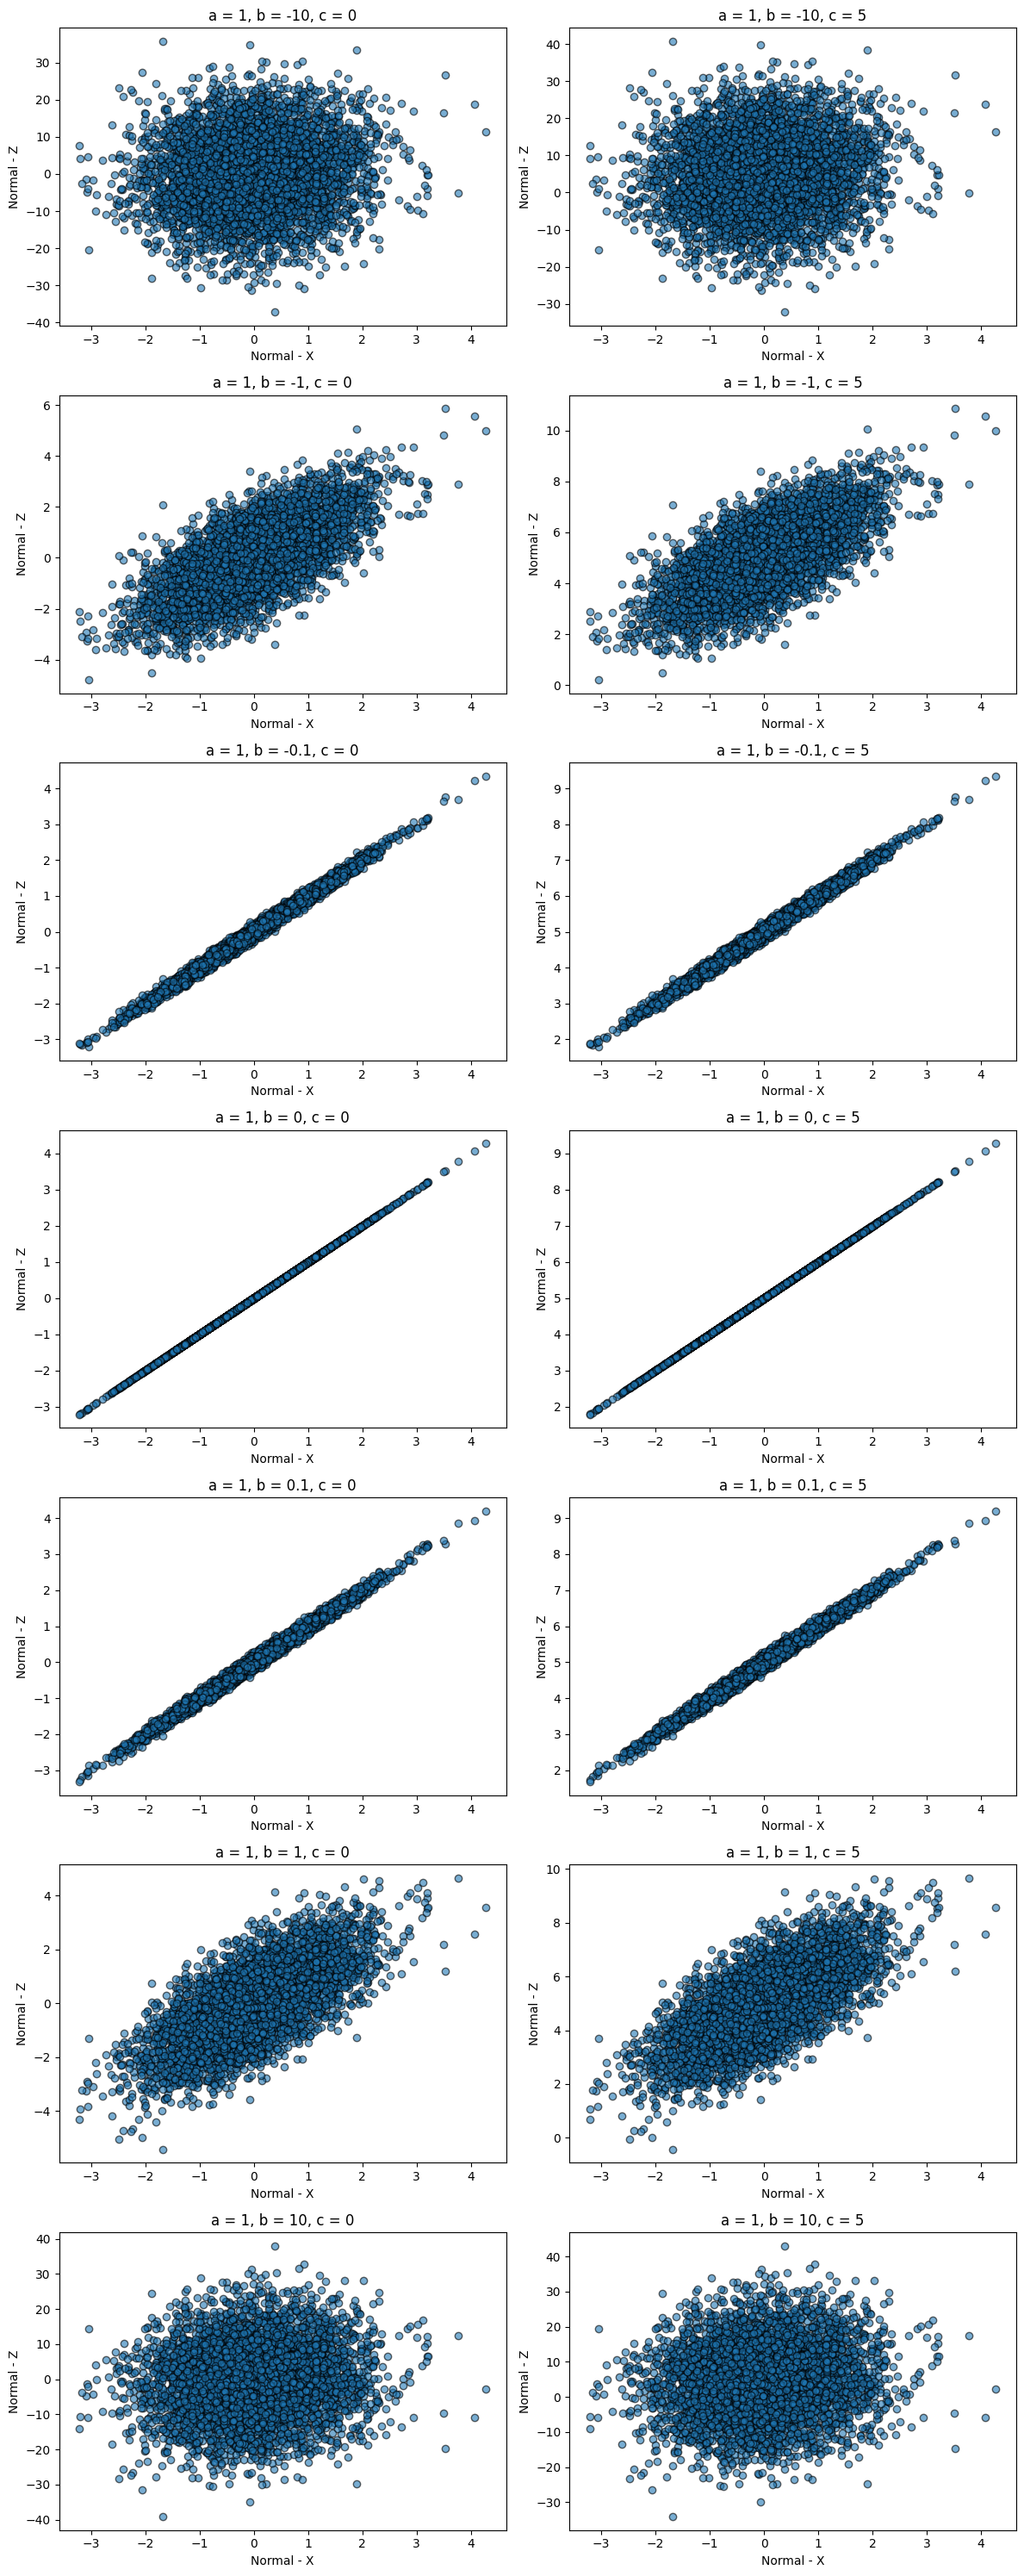

In [4]:
fig, axs = plt.subplots(7, 2, figsize=(12, 30))
ax = 0
ay = 0

for a in a_values:
  for b in b_values:
    for c in c_values:
      Z = a * X + b * Y + c

      axs[ax, ay].scatter(X, Z, edgecolor='k', alpha=0.6)
      axs[ax, ay].set_title(f'a = {a}, b = {b}, c = {c}')
      axs[ax, ay].set_xlabel('Normal - X')
      axs[ax, ay].set_ylabel('Normal - Z')

      ay+= 1
    ay = 0
    ax += 1

fig.tight_layout()
plt.show()